In [14]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
TRANSF = 'pitchshift'

In [16]:
df = pd.read_csv("metadata.csv")
embeds = []
labels = []
tracks = []
embeds_id = df[df["transf"]=="identity"]["file_embeds_path"]
if len(embeds_id==0):
    embeds.append(np.load(embeds_id.iloc[0])[0])
    labels.append(0)
embeds_df = df[df["transf"]==TRANSF]
for _, row in embeds_df.iterrows():
    embeds.append(np.load(row["file_embeds_path"])[0])
    labels.append(float(row["tranfs_param_name"]))
    tracks.append(row["file"])

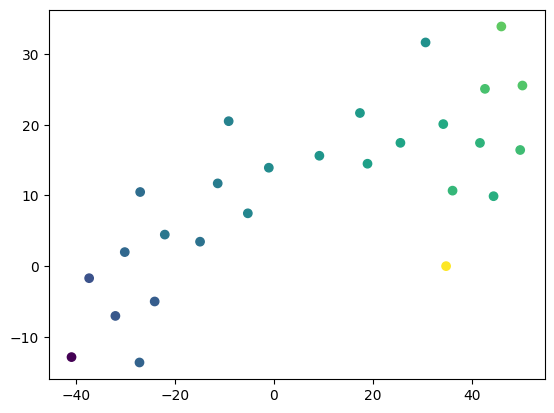

In [ ]:
tsne = TSNE(n_components=2, perplexity=10)
x = np.vstack(embeds)
x2d = tsne.fit_transform(x)

df_sns = pd.DataFrame()
df_sns["label"] = labels
df_sns["x"] = x2d[:, 0]
df_sns["y"] = x2d[:, 1]
plt.figure(figsize=(4,4))
str_title = "title"
sns.scatterplot(x="x", y="y", hue=df.label.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title=str_title)
plt.show()